In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import datetime
import json
import requests


In [48]:
cities = {
    'Pula': [0, 44.86833, 13.84806],
    'Pazin': [30, 45.23878, 13.93497],
    'Motovun': [25, 45.33673, 13.82821],
    'Labin': [4, 45.09485, 14.12319],
    'Buzet': [40, 45.40788, 13.96559],
    'Buje': [12, 45.40837, 13.65914],
    'Visnjan': [10, 45.27602, 13.71887],
    'Kanfanar': [17, 45.12284, 13.83850],
    'Zminj': [23, 45.14391, 13.90868],
    'Vodnjan': [7, 44.95896, 13.85134]
}
UNIX_time = [
    1696765160,
]

In [53]:
API_key = 'a38edf57331518ae5f14c42cff1ba255'


In [54]:
pula = json.loads(requests.get(f'https://api.openweathermap.org/data/2.5/weather?lat={cities["Pula"][1]}&lon={cities["Pula"][2]}&appid={API_key}').text)
pula

{'coord': {'lon': 13.8481, 'lat': 44.8683},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 295.46,
  'feels_like': 295.78,
  'temp_min': 295.46,
  'temp_max': 295.46,
  'pressure': 1019,
  'humidity': 78},
 'visibility': 10000,
 'wind': {'speed': 2.06, 'deg': 110},
 'clouds': {'all': 75},
 'dt': 1696866706,
 'sys': {'type': 1,
  'id': 6386,
  'country': 'HR',
  'sunrise': 1696828300,
  'sunset': 1696869123},
 'timezone': 7200,
 'id': 3192224,
 'name': 'Pula',
 'cod': 200}

In [55]:
pula = json.loads(requests.get(f'https://api.openweathermap.org/data/2.5/onecall/timemachine?lat={0}&lon={0}&dt={UNIX_time[0]}&appid={API_key}').text)
pula

{'lat': 0,
 'lon': 0,
 'timezone': 'Etc/GMT',
 'timezone_offset': 0,
 'current': {'dt': 1696765160,
  'sunrise': 1696743851,
  'sunset': 1696787452,
  'temp': 299.15,
  'feels_like': 299.15,
  'pressure': 1013,
  'humidity': 80,
  'dew_point': 295.43,
  'uvi': 10.87,
  'clouds': 100,
  'visibility': 10000,
  'wind_speed': 5.74,
  'wind_deg': 206,
  'wind_gust': 5.81,
  'weather': [{'id': 804,
    'main': 'Clouds',
    'description': 'overcast clouds',
    'icon': '04d'}]},
 'hourly': [{'dt': 1696723200,
   'temp': 298.5,
   'feels_like': 299.21,
   'pressure': 1012,
   'humidity': 81,
   'dew_point': 295,
   'uvi': 0,
   'clouds': 75,
   'visibility': 10000,
   'wind_speed': 5.25,
   'wind_deg': 226,
   'wind_gust': 5.04,
   'weather': [{'id': 803,
     'main': 'Clouds',
     'description': 'broken clouds',
     'icon': '04n'}]},
  {'dt': 1696726800,
   'temp': 298.39,
   'feels_like': 299.08,
   'pressure': 1011,
   'humidity': 81,
   'dew_point': 294.9,
   'uvi': 0,
   'clouds': 98,


In [17]:
list(pula.keys())

['coord',
 'weather',
 'base',
 'main',
 'visibility',
 'wind',
 'clouds',
 'dt',
 'sys',
 'timezone',
 'id',
 'name',
 'cod']

In [19]:
pula['main']

{'temp': 296.46,
 'feels_like': 296.62,
 'temp_min': 296.46,
 'temp_max': 296.46,
 'pressure': 1020,
 'humidity': 68}

In [20]:
pula['name']

'Pula'

In [21]:
pula['wind']

{'speed': 4.12, 'deg': 110}

In [22]:
def filter_city_weather_data_per_hour(hourly_data, city_name):
    temp = hourly_data['temp'] - 273.15
    humidity = hourly_data['humidity']
    pressure = hourly_data['pressure']
    description = hourly_data['weather'][0]['description']
    dt = hourly_data['dt']
    wind_speed = hourly_data['wind_speed']
    wind_deg = hourly_data['wind_deg']
    data = [round(temp, 2), 
            humidity, 
            pressure, 
            description, 
            dt, 
            wind_speed, 
            wind_deg, 
            city_name, 
            datetime.datetime.strftime(datetime.datetime.fromtimestamp(hourly_data['dt']), '%Y-%m-%d %H:%M:%S')]
    return data

In [24]:
df_pula = pd.read_csv('./istra_data/df_pula.csv')
df_pazin = pd.read_csv('./istra_data/df_pazin.csv')
df_motovun = pd.read_csv('./istra_data/df_motovun.csv')
df_labin = pd.read_csv('./istra_data/df_labin.csv')
df_buzet = pd.read_csv('./istra_data/df_buzet.csv')
df_buje = pd.read_csv('./istra_data/df_buje.csv')
df_visnjan = pd.read_csv('./istra_data/df_visnjan.csv')
df_kanfanar = pd.read_csv('./istra_data/df_kanfanar.csv')
df_zminj = pd.read_csv('./istra_data/df_zminj.csv')
df_vodnjan = pd.read_csv('./istra_data/df_vodnjan.csv')

In [25]:
plt.rcParams['figure.figsize'] = [10, 8]
plt.rcParams['figure.dpi'] = 100

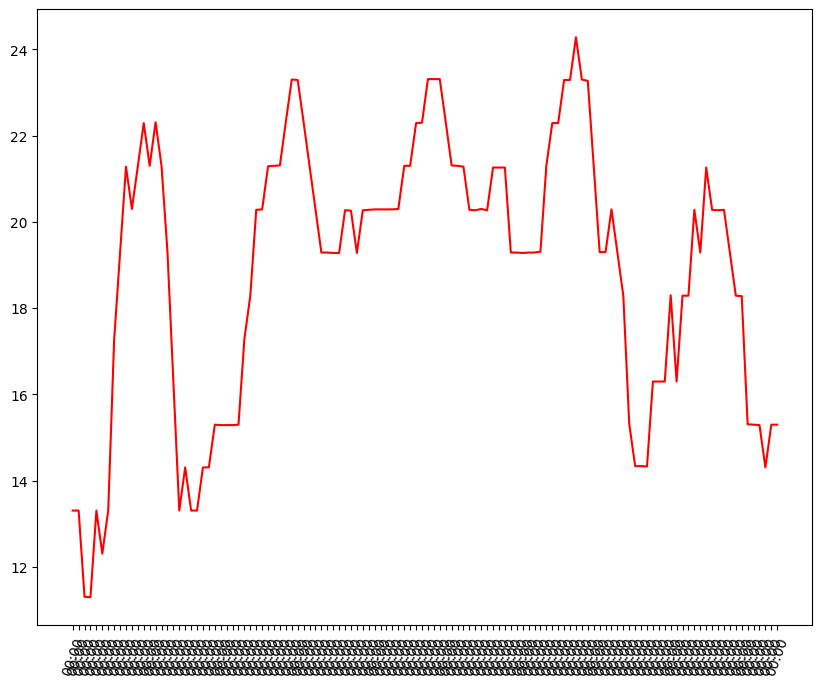

In [26]:
y1 = df_pula['temp']
x1 = df_pula['day']
fig, ax = plt.subplots()
plt.xticks(rotation=70)
hours = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(hours)
ax.plot(x1,y1,'r')

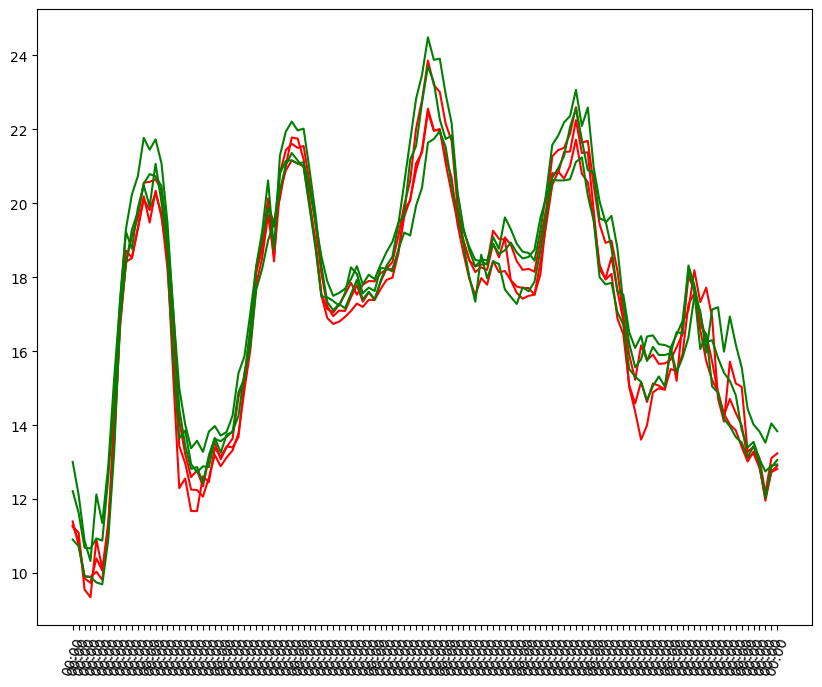

In [27]:
y1 = df_kanfanar['temp']
x1 = df_kanfanar['day']
y2 = df_pazin['temp']
x2 = df_pazin['day']
y3 = df_motovun['temp']
x3 = df_motovun['day']
y4 = df_labin['temp']
x4 = df_labin['day']
y5 = df_buzet['temp']
x5 = df_buzet['day']
y6 = df_buje['temp']
x6 = df_buje['day']
fig, ax = plt.subplots()
plt.xticks(rotation=70)
hours = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(hours)
plt.plot(x1,y1,'r',x2,y2,'r',x3,y3,'r')
plt.plot(x4,y4,'g',x5,y5,'g',x6,y6,'g')

In [28]:
dist = [df_pula['distance'][0],
     df_pazin['distance'][0],
     df_motovun['distance'][0],
     df_labin['distance'][0],
     df_buzet['distance'][0],
     df_buje['distance'][0],
     df_visnjan['distance'][0],
     df_kanfanar['distance'][0],
     df_zminj['distance'][0],
     df_vodnjan['distance'][0]
]
temp_max = [df_pula['temp'].max(),
     df_pazin['temp'].max(),
     df_motovun['temp'].max(),
     df_labin['temp'].max(),
     df_buzet['temp'].max(),
     df_buje['temp'].max(),
     df_visnjan['temp'].max(),
     df_kanfanar['temp'].max(),
     df_zminj['temp'].max(),
     df_vodnjan['temp'].max()
]
temp_min = [df_pula['temp'].min(),
     df_pazin['temp'].min(),
     df_motovun['temp'].min(),
     df_labin['temp'].min(),
     df_buzet['temp'].min(),
     df_buje['temp'].min(),
     df_visnjan['temp'].min(),
     df_kanfanar['temp'].min(),
     df_zminj['temp'].min(),
     df_vodnjan['temp'].min()
]

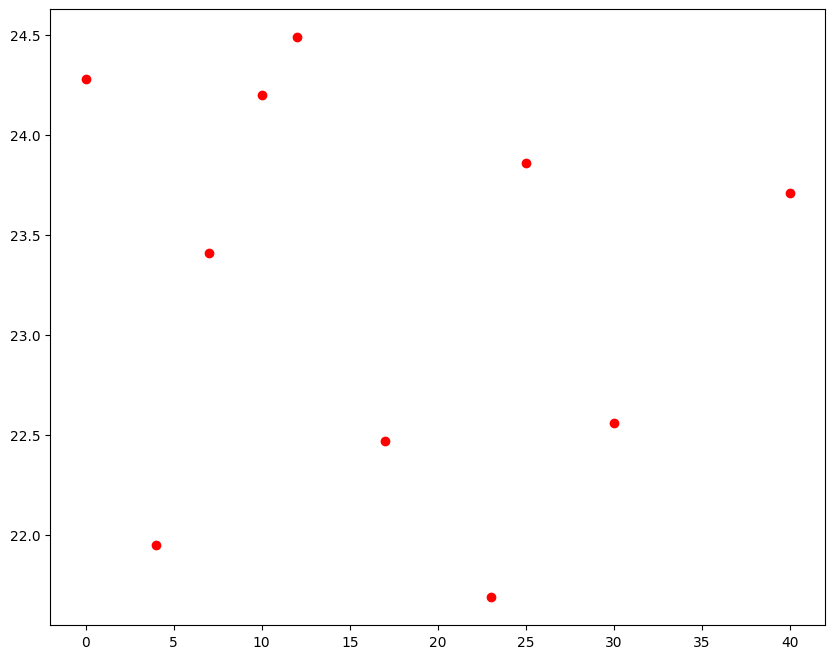

In [29]:
plt.plot(dist,temp_max,'ro')

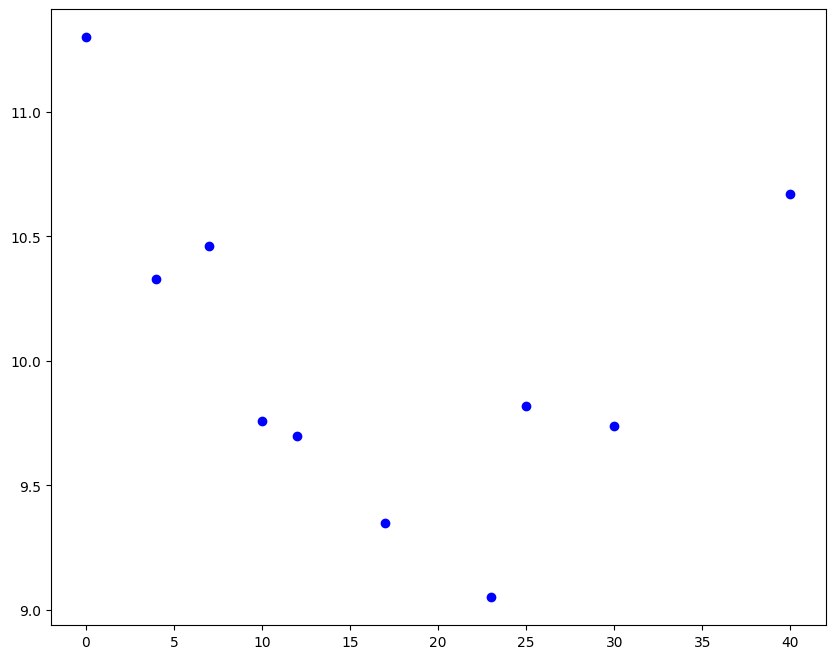

In [30]:
plt.plot(dist,temp_min,'bo')

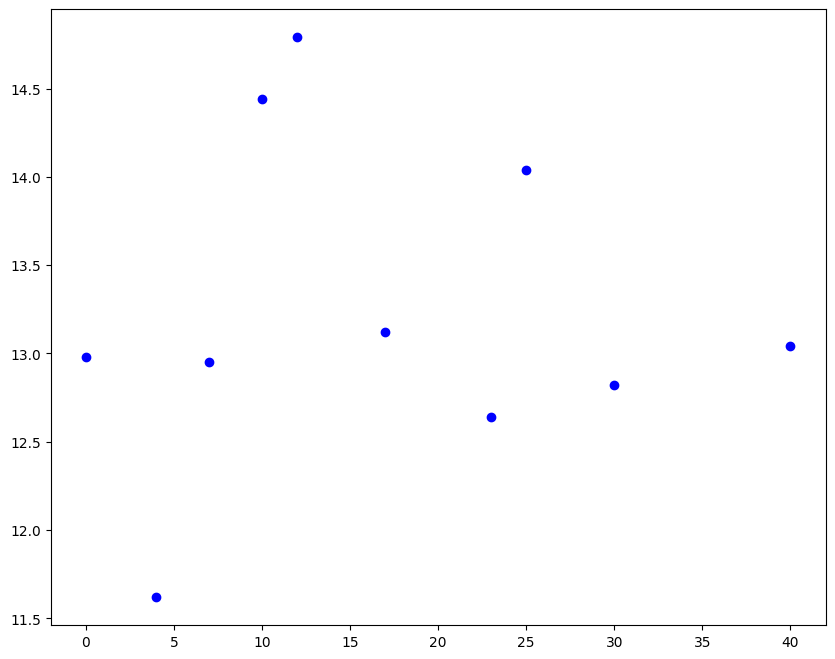

In [41]:
temp_dif = np.array(temp_max) - np.array(temp_min)
temp_dif
plt.plot(dist,temp_dif,'bo')

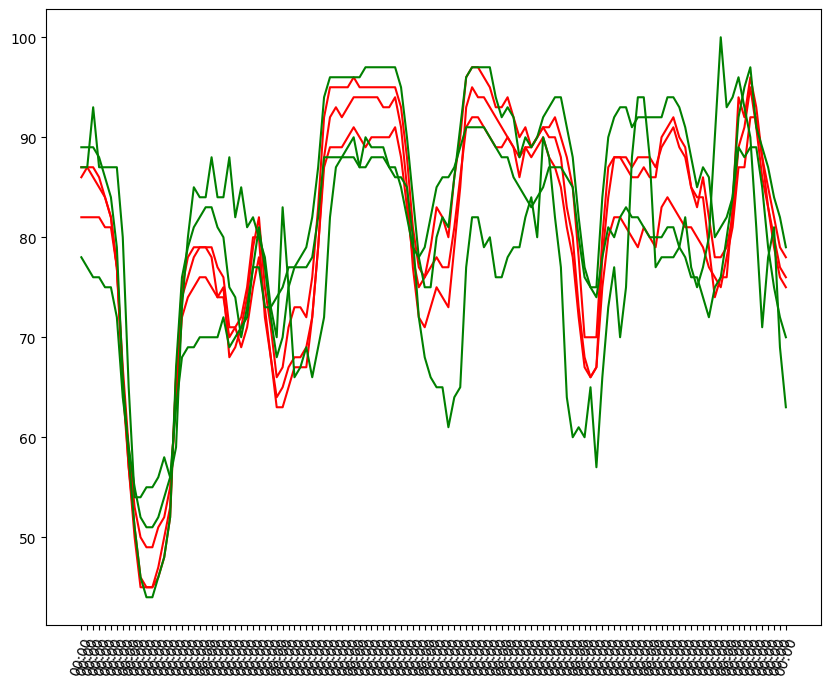

In [31]:
y1 = df_kanfanar['humidity']
x1 = df_kanfanar['day']
y2 = df_pazin['humidity']
x2 = df_pazin['day']
y3 = df_motovun['humidity']
x3 = df_motovun['day']
y4 = df_labin['humidity']
x4 = df_labin['day']
y5 = df_buzet['humidity']
x5 = df_buzet['day']
y6 = df_buje['humidity']
x6 = df_buje['day']
fig, ax = plt.subplots()
plt.xticks(rotation=70)
hours = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(hours)
plt.plot(x1,y1,'r',x2,y2,'r',x3,y3,'r')
plt.plot(x4,y4,'g',x5,y5,'g',x6,y6,'g')

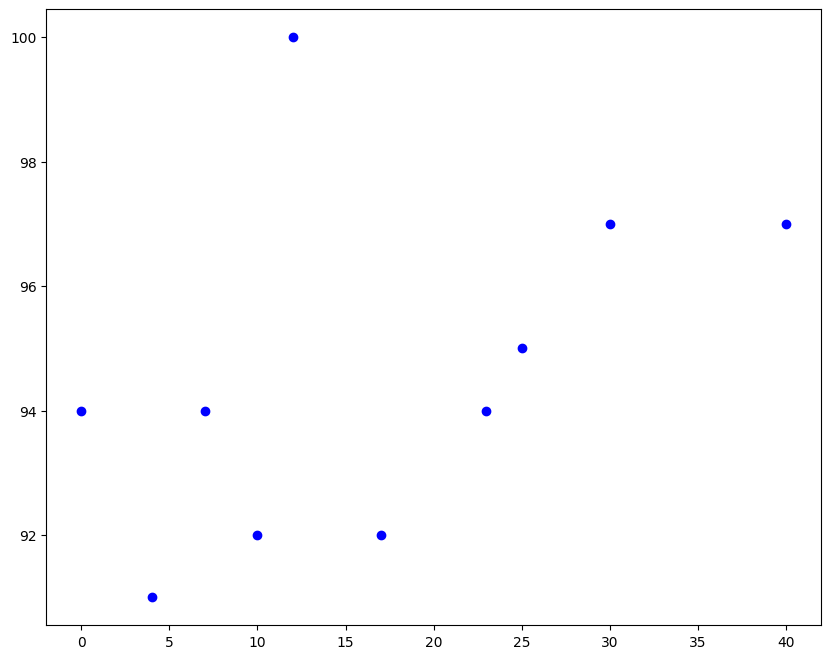

In [32]:
humidity_max = [df_pula['humidity'].max(),
     df_pazin['humidity'].max(),
     df_motovun['humidity'].max(),
     df_labin['humidity'].max(),
     df_buzet['humidity'].max(),
     df_buje['humidity'].max(),
     df_visnjan['humidity'].max(),
     df_kanfanar['humidity'].max(),
     df_zminj['humidity'].max(),
     df_vodnjan['humidity'].max()
]

plt.plot(dist, humidity_max,'bo')

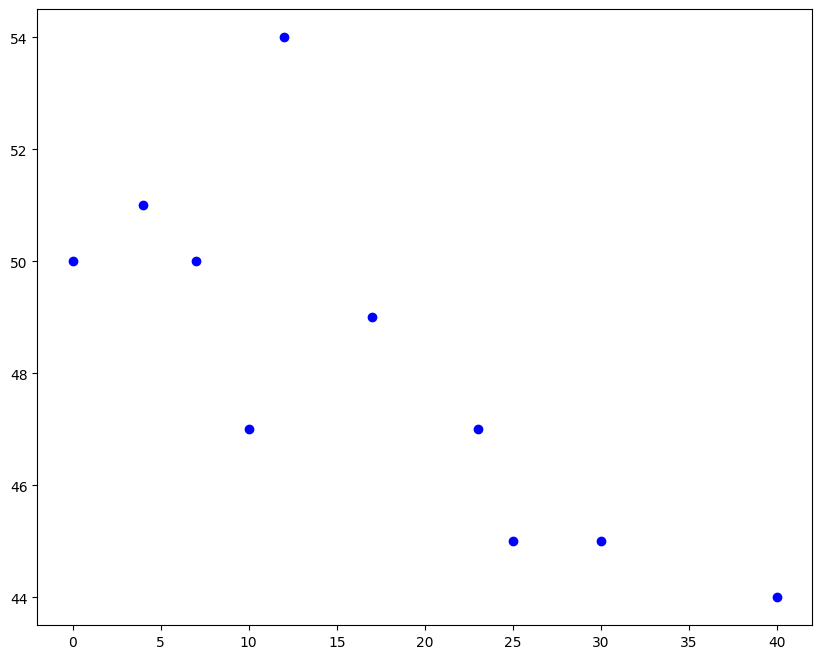

In [33]:
humidity_min = [df_pula['humidity'].min(),
     df_pazin['humidity'].min(),
     df_motovun['humidity'].min(),
     df_labin['humidity'].min(),
     df_buzet['humidity'].min(),
     df_buje['humidity'].min(),
     df_visnjan['humidity'].min(),
     df_kanfanar['humidity'].min(),
     df_zminj['humidity'].min(),
     df_vodnjan['humidity'].min()
]

plt.plot(dist, humidity_min,'bo')

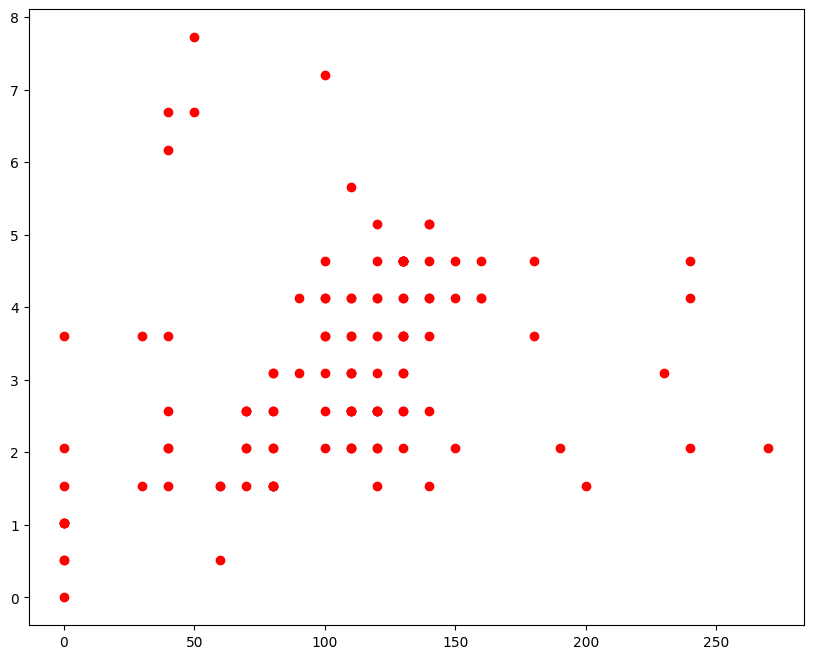

In [34]:
plt.plot(df_pula['wind_deg'],df_pula['wind_speed'],'ro')

In [35]:
hist, bins = np.histogram(df_pula['wind_deg'], 8, [0,360])
print(hist)
print(bins)

[19 21 57 14  4  4  1  0]
[  0.  45.  90. 135. 180. 225. 270. 315. 360.]


In [36]:
def display_rose_wind(values, city_name, max_value):
   N = 8
   theta = np.arange(0., 2 * np.pi, 2 * np.pi / N)
   radii = np.array(values)
   plt.axes([0.025, 0.025, 0.95, 0.95], polar=True)
   colors = [(1 - x/max_value, 1 - x/max_value, 0.75) for x in radii]
   plt.bar(theta + np.pi/8, radii, width=(2*np.pi/N), bottom=0.0, color=colors)
   plt.title(city_name,x=0.2, fontsize=20)

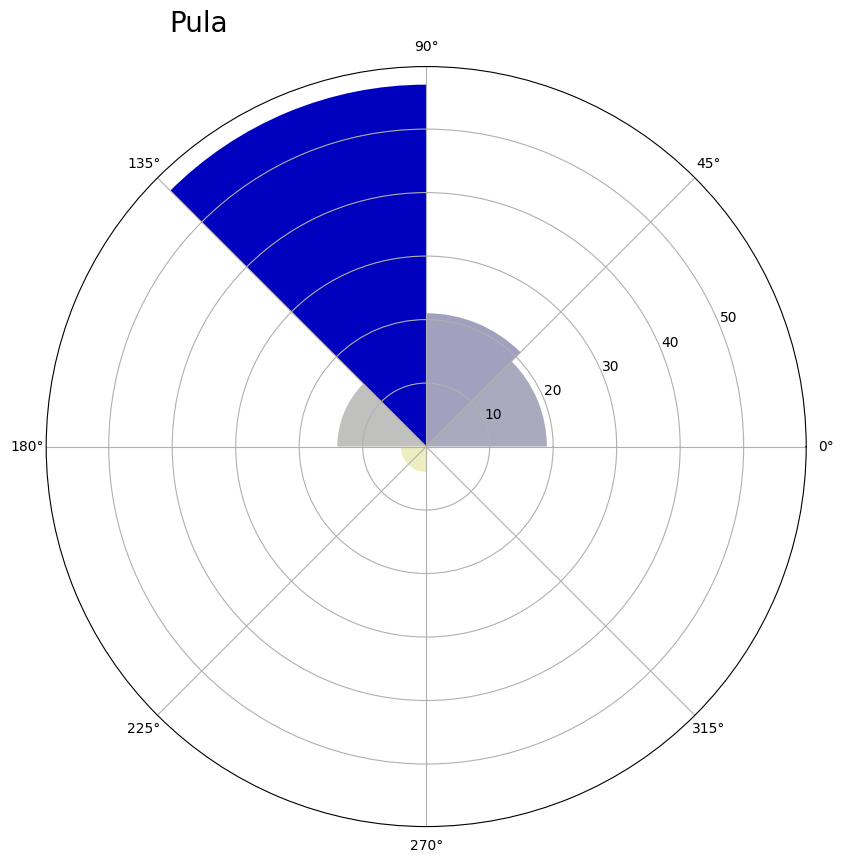

In [37]:
display_rose_wind(hist,'Pula', max(hist))

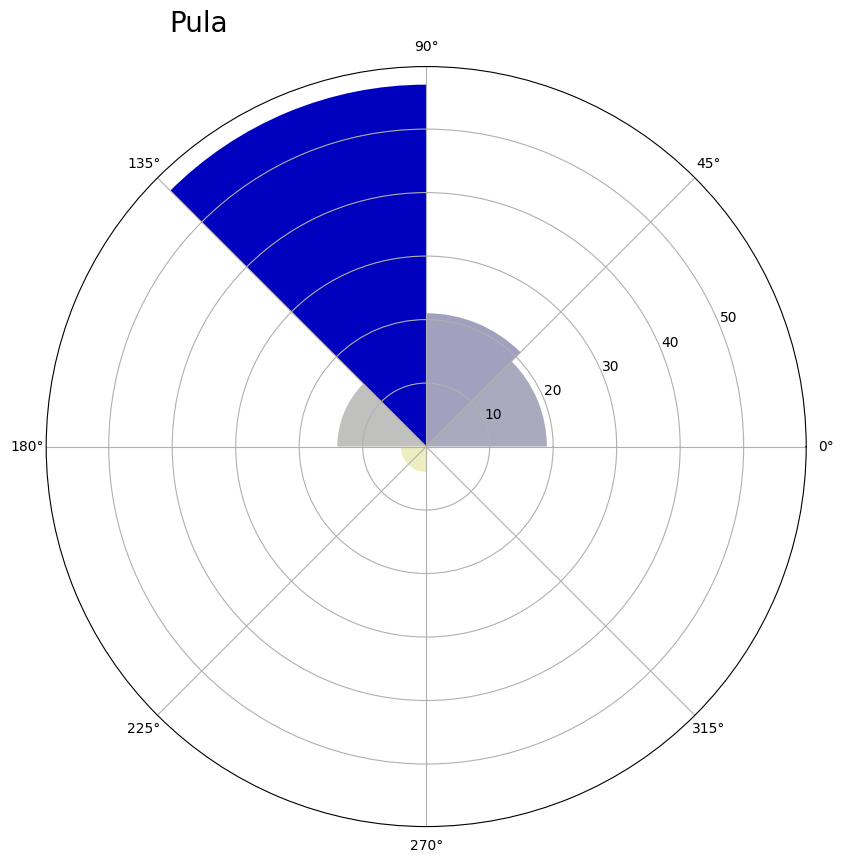

In [38]:
display_rose_wind(hist,'Pula', max(hist))